# Import Library

In [1]:
import pickle
import os
import numpy as np
import cv2
from helpers import corner_utils as utlis
from helpers import ocr_helpers as ocr_utils

# Calculate 4 point corner & resize image

In [13]:
image_path = './test_data/discharge_record/1.jpg'
img = ocr_utils.read_image_from_dir(image_path)
img_extend = np.asarray(img)
edges_image = utlis.edges_det(img_extend)
edges_image = cv2.morphologyEx(edges_image, cv2.MORPH_CLOSE, np.ones((5, 11)))
page_contour =  utlis.find_page_contours(edges_image)
page_contour =  utlis.four_corners_sort(page_contour)
crop_image = utlis.persp_transform(img_extend, page_contour)
crop_image = ocr_utils.resize(crop_image)

# Split field

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13}


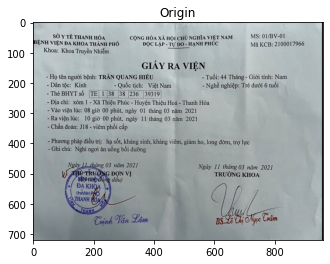

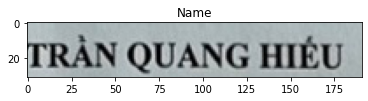

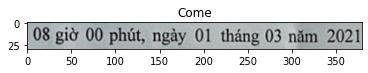

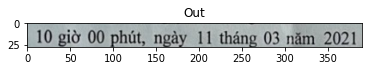

In [17]:
# fake detection
detect_path = './test_data/dictection.pickle'
detections = pickle.load(open(detect_path, 'rb')) 


def split_field_discharge_record(detections, num_classes, crop_image):
    im_height, im_width = crop_image.shape[:2]
    boxes = [[im_height, im_width, 0, 0] for i in range(num_classes)]
    detection_classes = detections['detection_classes']
    detection_boxes  = detections['detection_boxes']
    detection_scores  = detections['detection_scores']
#     verify_missing_classes = set(detection_classes)
#     print(verify_missing_classes)
    for i in range(len(detection_classes)):
        class_id = detection_classes[i]
        if detection_scores[i] <= 0.3:
            continue
        (ymin, xmin, ymax, xmax) = (
            detection_boxes[i][0] * im_height, 
            detection_boxes[i][1] * im_width, 
            detection_boxes[i][2] * im_height, 
            detection_boxes[i][3] * im_width
        )
        if ymin < boxes[class_id -1][0]: boxes[class_id -1][0] = ymin
        if xmin < boxes[class_id -1][1]: boxes[class_id -1][1] = xmin
        if ymax > boxes[class_id -1][2]: boxes[class_id -1][2] = ymax
        if xmax > boxes[class_id -1][3]: boxes[class_id -1][3] = xmax
    boxes = np.array(boxes).astype(int)
    return boxes
   
(name_boxes, age_boxes, gender_boxes, nation_boxs, country_box, id_boxes, add_boxes, \
     come_time_boxes, out_time_boxes, diagnostic_boxes, solution_boxes, note_boxes, job_boxes) = \
        split_field_discharge_record(detections, 13, crop_image)

ocr_utils.implt(img, None, 'Origin')
ocr_utils.implt(img.crop((name_boxes[1], name_boxes[0], name_boxes[3], name_boxes[2])), None, 'Name')
ocr_utils.implt(img.crop((come_time_boxes[1], come_time_boxes[0], come_time_boxes[3], come_time_boxes[2])), None, 'Come')
ocr_utils.implt(img.crop((out_time_boxes[1], out_time_boxes[0], out_time_boxes[3], out_time_boxes[2])), None, 'Out')
